In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('bikes_rent.csv', delimiter=',')

In [3]:
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [5]:
# 1) чем больше месяц, тем меньше число прокатов
# 2) weekday, holiday

In [6]:
print(df.corr())

                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

In [7]:
print(df.corrwith(df['cnt']))

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64


In [8]:
print(df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr())

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [9]:
print(df.mean())

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [10]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.coef_

array([ 5.16754196e+02,  9.82559248e+02, -1.13333859e+02, -6.19023821e+01,
        1.02897667e+02,  2.08617616e+01, -3.38220442e+02, -6.11508000e+02,
        1.59346296e+03, -1.89785782e+02,  1.27435181e+13, -1.27435181e+13])

In [13]:
print(mean_squared_error(y_test, y_pred))

866417.6416749764


In [14]:
l1 = Lasso().fit(X_train, y_train)
y_pred = l1.predict(X_test)
l1.coef_

array([ 5.08679996e+02,  9.79129084e+02, -1.03172352e+02, -6.33741531e+01,
        1.00609457e+02,  2.02928712e+01, -3.45381842e+02, -2.69806399e+02,
        1.24917201e+03, -1.84665682e+02, -2.01962236e+02, -7.57652883e-08])

In [15]:
print(mean_squared_error(y_test, y_pred))

838460.2163524671


In [16]:
l2 = Ridge().fit(X_train, y_train)
y_pred = l2.predict(X_test)
l2.coef_

array([ 511.7088071 ,  978.54886917, -105.80898128,  -64.52545494,
        100.81902331,   21.44680275, -346.65245687, -171.36280468,
       1148.36554787, -183.91814968, -102.39098755, -102.3909876 ])

In [17]:
print(mean_squared_error(y_test, y_pred))

830460.6256298488


In [18]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for i, j in enumerate(alphas):
    l1 = Lasso(alpha=j).fit(X_train, y_train)
    y_pred = l1.predict(X_test)
    coefs_lasso[i] = l1.coef_
print(coefs_lasso)

[[ 5.08679996e+02  9.79129084e+02 -1.03172352e+02 -6.33741531e+01
   1.00609457e+02  2.02928712e+01 -3.45381842e+02 -2.69806399e+02
   1.24917201e+03 -1.84665682e+02 -2.01962236e+02 -7.57652883e-08]
 [ 3.82092993e+02  9.35196557e+02  0.00000000e+00 -3.35305987e+01
   5.38851248e+01  0.00000000e+00 -3.45439301e+02  0.00000000e+00
   9.53286339e+02 -1.22557271e+02 -1.47286609e+02 -1.15088491e-08]
 [ 3.40645714e+02  8.91886615e+02  0.00000000e+00 -0.00000000e+00
   1.02451154e+01  0.00000000e+00 -3.44099396e+02  0.00000000e+00
   9.20972687e+02 -5.43818981e+01 -9.04654233e+01 -1.05540739e-08]
 [ 2.98804992e+02  8.48665496e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.35401101e+02  0.00000000e+00
   8.90219498e+02 -0.00000000e+00 -3.80361401e+01 -9.66042364e-09]
 [ 2.62721961e+02  8.01175377e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.94061791e+02  0.00000000e+00
   8.67417652e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 2.

In [19]:
for i, j in enumerate(alphas):
    l2 = Ridge(alpha=j).fit(X_train, y_train)
    y_pred = l2.predict(X_test)
    coefs_ridge[i] = l2.coef_
print(coefs_ridge)

[[ 511.7088071   978.54886917 -105.80898128  -64.52545494  100.81902331
    21.44680275 -346.65245687 -171.36280468 1148.36554787 -183.91814968
  -102.39098755 -102.3909876 ]
 [ 398.57700349  894.83040842   -4.43866722  -64.20510257   87.27962586
    25.03252163 -334.05159486  442.73246847  507.32430294 -176.55064854
  -104.76655753 -104.76655753]
 [ 343.31789353  824.16167576   37.77166097  -59.80188391   79.83707922
    25.16898823 -317.06187197  444.72388198  478.59198718 -172.09775051
  -102.23529387 -102.23529387]
 [ 309.44656351  764.29034689   59.81061913  -55.8633256    73.87965774
    24.90916355 -302.2362854   436.15827883  459.32894361 -165.92777215
   -99.71687844  -99.71687844]
 [ 285.71935708  712.80682504   72.61416874  -52.41374247   68.88361623
    24.47717259 -289.019544    425.17019637  442.8748317  -159.24427966
   -97.28980335  -97.28980335]
 [ 267.67176808  668.01039465   80.47968955  -49.38949567   64.58854473
    23.96308012 -277.06480867  413.57994086  427.9576

Text(0.5, 1.0, 'Lasso')

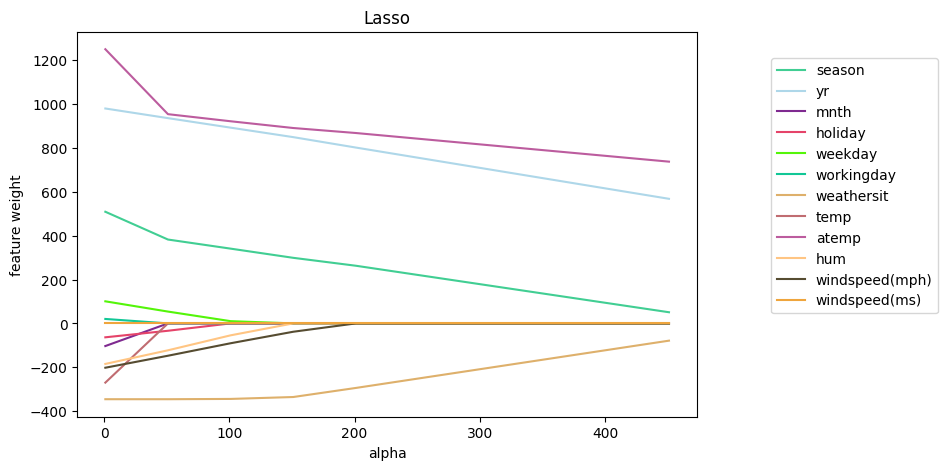

In [20]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.95))
plt.xlabel('alpha')
plt.ylabel('feature weight')
plt.title('Lasso')

In [21]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.95))
plt.xlabel('alpha')
plt.ylabel('feature weight')
plt.title('Ridge')

Text(0.5, 1.0, 'Ridge')

Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
- Lasso

Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит
- Веса зануляться. При росте alpha сложность модели уменьшается и в итоге может дойти до константы

Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Ситается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.
- Да. Нет

Какой из регуляризаторов подойдет для отбора неинформативных признаков?
- Lasso

In [22]:
alphas = np.arange(1, 100, 5)
lcv = LassoCV(alphas=alphas, cv=3).fit(X_train, y_train)
plt.plot(lcv.alphas_, np.mean(lcv.mse_path_, axis=1))
plt.xlabel('alpha')
plt.ylabel('mse')
print('alpha: ', lcv.alpha_)
for item in zip(df.columns[:-1], lcv.coef_.round()):
    print(item)

alpha:  16
('season', 423.0)
('yr', 966.0)
('mnth', -14.0)
('holiday', -57.0)
('weekday', 84.0)
('workingday', 12.0)
('weathersit', -348.0)
('temp', 0.0)
('atemp', 974.0)
('hum', -168.0)
('windspeed(mph)', -187.0)
('windspeed(ms)', -0.0)


In [23]:
print(lcv.mse_path_)

[[861874.27236834 732798.26686767 878584.87299112]
 [854769.69809917 732103.72005009 871512.13723953]
 [848021.72657601 731793.70409232 864549.53003821]
 [841631.0132571  731877.65789703 856417.31937775]
 [835597.56103313 732355.63667023 848518.77127251]
 [829921.36991439 733227.64075409 841018.55899456]
 [824602.43990092 734493.67015074 833845.20508287]
 [819640.77099272 736153.72486017 826914.73659518]
 [815036.3631898  738207.80488239 820227.17692161]
 [810789.21671376 740655.9102174  813782.52613178]
 [806889.95337399 743498.0408652  807580.78422589]
 [803333.09387377 746734.19682579 801621.95120394]
 [800178.62403353 750364.37809917 795906.02706593]
 [797426.49349814 754388.58468534 790433.01181187]
 [795076.70206155 758806.81658429 785202.90544175]
 [793129.24972294 763258.05565341 780012.89771103]
 [791584.13648229 768730.23026732 774608.56931033]
 [790441.3623396  775755.71432281 770127.59992153]
 [788553.73904654 783575.48241537 768586.83402422]
 [784561.96176551 791263.185433

[784561.96176551 731793.70409232 768586.83402422]
alpha:  1 , mse:  784561.96
alpha:  86 , mse:  731793.7
alpha:  6 , mse:  768586.83


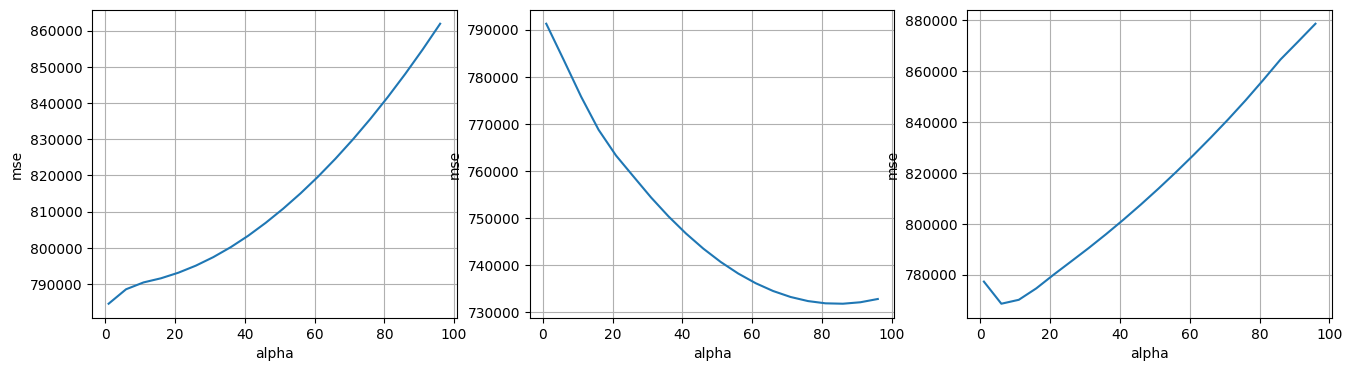

In [26]:
print(np.min(lcv.mse_path_, axis=0))
for i, mean in enumerate(np.min(lcv.mse_path_, axis=0)):
    ind = lcv.mse_path_[:,i].argmin(axis=0)
    print('alpha: ', lcv.alphas_[ind], ', mse: ', round(mean, 2))
plt.figure(figsize=(16, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(lcv.alphas_, lcv.mse_path_[:,i])
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.grid()

1) В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?
- season, atemp, yr, weekday. Видна. Да, скорее логично.
2) Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?
- weathersit, hum, windspeed(mph). Видна. Да
3) Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?
- temp, windspeed. Признаки линейно-зависимы.